In [1]:
! pip install -qU langgraph

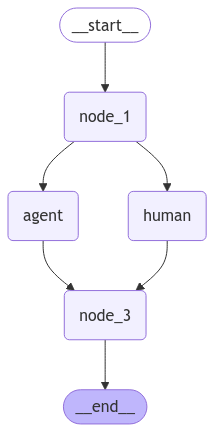

In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,END,START
from langgraph.graph.state import CompiledStateGraph
from IPython.display import display,Image
from langgraph.types import interrupt

class State(TypedDict):
    message:str
    
def node_1(state:State):
    print("--- Node_1 ---")
    return {'message':state['message']}

def agent(state:State):
    print("--- Agent ---")
    return {'message':state['message']}
def human(state:State):
    print("--- Human ---")
    return {'message':state['message']}

def node_3(state:State):
    print("--- Node_3 ---")
    return {'message':state['message']}


builder : StateGraph = StateGraph(State)

builder.add_node("node_1",node_1)
builder.add_node("agent",agent)
builder.add_node("human",human)
builder.add_node("node_3",node_3)

builder.add_edge(START,"node_1")
builder.add_edge("node_1","agent")
builder.add_edge("node_1","human")
builder.add_edge("agent","node_3")
builder.add_edge("human","node_3")
builder.add_edge("node_3",END)

graph :CompiledStateGraph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


### This Error is due to the Parallel Calling of two nodes at the same time

In [3]:
graph.invoke({"message":"Hello World!"})

--- Node_1 ---
--- Agent ---
--- Human ---


InvalidUpdateError: At key 'message': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_CONCURRENT_GRAPH_UPDATE

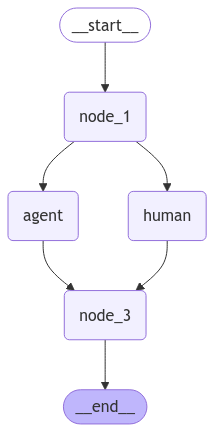

In [46]:
from langgraph.graph.message import add_messages
from typing import Annotated
class State(TypedDict):
    message:Annotated[list,add_messages]
    
def node_1(state:State):
    print("--- Node_1 ---")
    return {'message':"Hi!"}

def human(state:State):
    print("--- Human ---")
    return {'message':'I am a human!'}

def agent(state:State):
    print("--- Agent ---")
    return {'message':"I'm an agent!"}


def node_3(state:State):
    print("--- Node_3 ---")
    return {'message':state["message"]}


builder : StateGraph = StateGraph(State)

builder.add_node("node_1",node_1)
builder.add_node("agent",agent)
builder.add_node("human",human)
builder.add_node("node_3",node_3)

builder.add_edge(START,"node_1")
builder.add_edge("node_1","human")
builder.add_edge("node_1","agent")
builder.add_edge("human","node_3")
builder.add_edge("agent","node_3")

builder.add_edge("node_3",END)

graph :CompiledStateGraph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [41]:
result =graph.invoke({"message":"Hello World!"})
for i in result['message']:
    i.pretty_print()

--- Node_1 ---
--- Agent ---
--- Human ---
--- Node_3 ---
================================ Human Message =================================

Hello World!
================================ Human Message =================================

Hi!
================================ Human Message =================================

I'm an agent!
================================ Human Message =================================

I am a human!


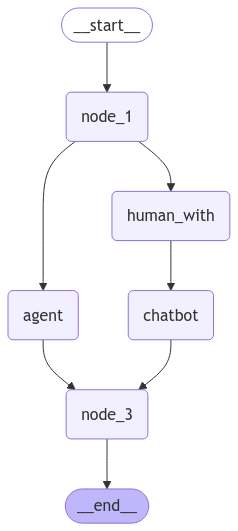

In [96]:
class State(TypedDict):
    message:Annotated[list, add_messages]
    
def node_1(state:State):
    print("--- Node_1 ---")
    return {'message':state['message']}

def agent(state:State):
    print("--- Agent ---")
    return {'message':'I am an agent!'}
def human(state:State):
    print("--- Human ---")
    return {'message':'I am a human'}

def chatbot(state:State):
    print("--- Chatbot ---")
    return {'message':state["message"][2].content +' with chatbot!'}

def node_3(state:State):
    print("--- Node_3 ---")
    return {'message':'I am node_3!'}


builder : StateGraph = StateGraph(State)

builder.add_node("node_1",node_1)
builder.add_node("agent",agent)
builder.add_node("human_with",human)
builder.add_node("chatbot",chatbot)
builder.add_node("node_3",node_3)

builder.add_edge(START,"node_1")
builder.add_edge("node_1","agent")
builder.add_edge("node_1","human_with")
builder.add_edge('human_with','chatbot')
builder.add_edge(["chatbot","agent"],"node_3")
builder.add_edge("node_3",END)

graph :CompiledStateGraph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [97]:
result =graph.invoke({"message":"Hello World!"})
for i in result['message']:
    i.pretty_print()

--- Node_1 ---
--- Agent ---
--- Human ---
--- Chatbot ---
--- Node_3 ---
================================ Human Message =================================

Hello World!
================================ Human Message =================================

I am an agent!
================================ Human Message =================================

I am a human
================================ Human Message =================================

I am a human with chatbot!
================================ Human Message =================================

I am node_3!
